# Pivot Tables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
sns.set()

## All aboard the data train (ship?)

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [4]:
titanic.groupby(['class', 'sex'])['survived'].mean().unstack()

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


In [5]:
# Group by class and gender, select survival, apply a mean aggregate, combine the resulting groups, unstack the hierarchical index
titanic.groupby(['class', 'sex'])['survived'].aggregate('mean').unstack()

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


In [6]:
# Make a pivot table that does the same thing
titanic.pivot_table('survived', index='class', columns='sex')

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


In [7]:
age = pd.cut(titanic['age'], [0, 18, 80])

In [8]:
# Make a multilevel pivot table  with sex and age as indices, class as columns, on survival
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [9]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
fare = pd.qcut(titanic['fare'], 2)  # Auto-cut fare into two quartiles

In [11]:
# Make a multi-indexed pivot table for who survived. Sex and age on index, class and fare on columns.
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [12]:
# Make a pivot table whose index is 'sex' and whose columns are 'class', that gives both the sum of survivors and the mean fare.
titanic.pivot_table(index='sex', columns='class', aggfunc={'survived': sum, 'fare': 'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [13]:
# Make a pivot table showing survival rate between sex and columns, but also show totals.
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


## Example: Birthrate Data

In [14]:
# LOAD 'ER UP
# !curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

In [78]:
# Births in the united states by day, from 1969 to 2008
births = pd.read_csv('births.csv')

In [79]:
births['year'].unique()

array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008], dtype=int64)

In [80]:
births = births[births['year'] != 1969]
births.head()

,year,month,day,gender,births
768,1970,1,1.0,F,4064
769,1970,1,1.0,M,4308
770,1970,1,2.0,F,4536
771,1970,1,2.0,M,4698
772,1970,1,3.0,F,4398


In [18]:
# Add a decade column, look at male and female births as a function of decade
births['decade'] = 10 * (births['year'] // 10)
births_piv = births.pivot_table('births', index='year', columns='gender', aggfunc='sum')

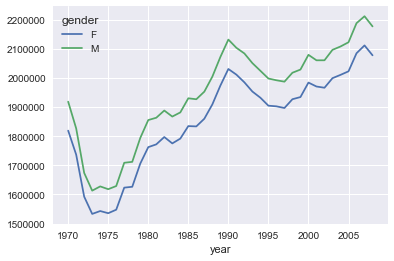

In [19]:
# Line graph by year
births_piv.plot()

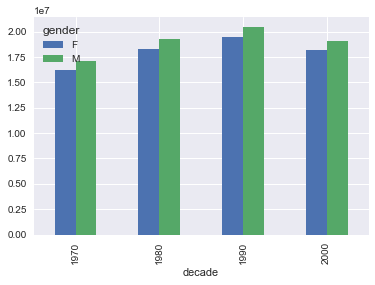

In [20]:
# Bar graph by decade
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum').plot(kind='bar')

In [21]:
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [22]:
# Make 'quartiles', which breaks up births['births'] into the 25th, 50th, and 75th percentile.
quartiles = np.percentile(births['births'], [25, 50, 75])

In [23]:
# mu = 50th percentile
mu = quartiles[1]

In [24]:
# sig = 0.74 * (quartiles[2] - quartiles[0])  # interquartile range of a normal distribution
sig = 0.74 * (quartiles[2] - quartiles[0])
sig

700.77999999999997

In [25]:
births.head()

,year,month,day,gender,births,decade
768,1970,1,1.0,F,4064,1970
769,1970,1,1.0,M,4308,1970
770,1970,1,2.0,F,4536,1970
771,1970,1,2.0,M,4698,1970
772,1970,1,3.0,F,4398,1970


In [26]:
# births = a query that filters out rows with births outside the sig values
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [27]:
# Make the 'day' column integers
births['day'] = births['day'].astype(int)

In [28]:
# Create a datetime index from year, month, day.
births.index = pd.to_datetime(10000 * births['year'] + 100 * births['month'] + births['day'], format='%Y%m%d')

In [29]:
# Make a 'dayofweek' column
births['DayOfWeek'] = births.index.dayofweek

[Text(0,0,'Mon'),
 Text(0,0,'Tues'),
 Text(0,0,'Wed'),
 Text(0,0,'Thurs'),
 Text(0,0,'Fri'),
 Text(0,0,'Sat'),
 Text(0,0,'Sun')]

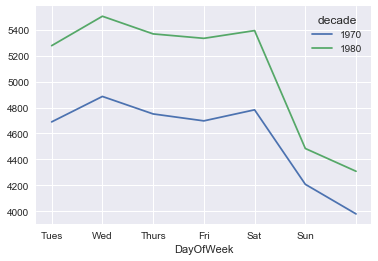

In [43]:
# Plot a pivot table with day of week and decade pivoted on births, aggregated with mean
births.pivot_table('births', index='DayOfWeek', columns='decade', aggfunc='mean').plot().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])

In [68]:
# Group data by month and day using a multiindexed pivot table
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])

In [73]:
# Turn months and days into a date by associating them with a dummy year variable
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]

In [75]:
births_by_date.head()

,births
2012-01-01,3996.921053
2012-01-02,4234.052632
2012-01-03,4486.684211
2012-01-04,4576.157895
2012-01-05,4625.131579


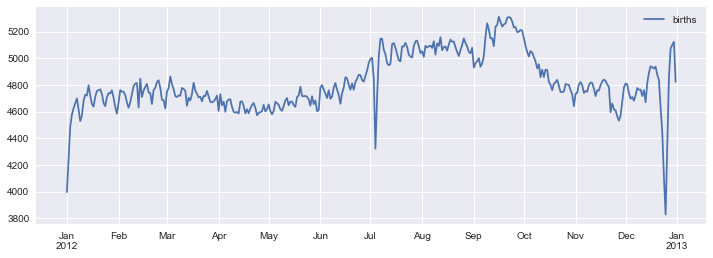

In [77]:
# Make a plot reflecting number of births by day of year
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)